In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = 'data/'
listings = pd.read_csv(data_folder + 'listings.csv')
reviews = pd.read_csv(data_folder + 'reviews.csv')
calendar = pd.read_csv(data_folder + 'calendar.csv')
neighborhoods = pd.read_csv(data_folder + 'neighbourhoods.csv')

height has been deprecated.



In [2]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [3]:
listings.loc[0]

id                                                                           20872145
listing_url                                     https://www.airbnb.com/rooms/20872145
scrape_id                                                              20171005235014
last_scraped                                                               2017-10-06
name                                                      Charming Boston Residential
summary                             Berber carpeting. The living room has two full...
space                                                       It's on the second floor.
description                         Berber carpeting. The living room has two full...
experiences_offered                                                              none
neighborhood_overview               Roslindale is an amazing up and coming town in...
notes                                                                             NaN
transit                             Public transportat

In [4]:
date_columns = ['first_review', 'last_review', 'calendar_last_scraped', 'host_since', 'last_scraped']
for col in date_columns:
    if not is_datetime64_dtype(listings[col]):
        listings[col] = pd.to_datetime(listings[col])
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('$', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)
listings['amenities'] = listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

In [5]:
listings.loc[0]['first_review']

Timestamp('2017-09-16 00:00:00')

In [6]:
listings['amenities']

0       [Wireless Internet, Gym, Heating, Smoke detect...
1       [Wireless Internet, Air conditioning, Kitchen,...
2       [Internet, Wireless Internet, Air conditioning...
3       [TV, Cable TV, Internet, Wireless Internet, Ai...
4       [Wireless Internet, Air conditioning, Kitchen,...
5       [Internet, Wireless Internet, Air conditioning...
6       [TV, Cable TV, Internet, Wireless Internet, Ai...
7       [Wireless Internet, Air conditioning, Kitchen,...
8       [TV, Wireless Internet, Air conditioning, Kitc...
9       [TV, Cable TV, Internet, Wireless Internet, Ai...
10      [Cable TV, Wireless Internet, Air conditioning...
11      [TV, Internet, Wireless Internet, Air conditio...
12      [TV, Wireless Internet, Kitchen, Breakfast, He...
13      [TV, Internet, Wireless Internet, Air conditio...
14      [TV, Cable TV, Internet, Wireless Internet, Ki...
15      [TV, Wireless Internet, Kitchen, Breakfast, He...
16      [TV, Internet, Wireless Internet, Air conditio...
17      [TV, W

In [7]:
listings.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,4.870000e+03,4.870000e+03,4.870000e+03,0.0,4870.000000,4870.000000,0.0,4870.000000,4870.000000,4870.000000,...,3936.000000,3941.000000,3928.000000,3940.000000,3927.000000,3927.000000,0.0,0.0,4870.000000,3986.000000
mean,1.293651e+07,2.017101e+13,4.088556e+07,NaN,78.667351,78.667351,NaN,42.339999,-71.083943,3.298152,...,9.588923,9.443035,9.742617,9.713706,9.487395,9.334861,NaN,NaN,19.301848,2.204792
std,6.202199e+06,0.000000e+00,3.971610e+07,NaN,219.284219,219.284219,NaN,0.025338,0.032768,2.131683,...,0.773592,0.957797,0.685026,0.722654,0.822990,0.890983,NaN,NaN,43.029043,2.336672
min,3.781000e+03,2.017101e+13,4.240000e+03,NaN,0.000000,0.000000,NaN,42.235760,-71.179257,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,1.000000,0.020000
25%,7.913572e+06,2.017101e+13,1.011587e+07,NaN,1.000000,1.000000,NaN,42.329070,-71.105007,2.000000,...,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,NaN,1.000000,0.450000
50%,1.431376e+07,2.017101e+13,2.695608e+07,NaN,2.000000,2.000000,NaN,42.345512,-71.077124,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.300000
75%,1.857908e+07,2.017101e+13,6.297457e+07,NaN,11.000000,11.000000,NaN,42.356009,-71.061114,4.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,9.000000,3.247500
max,2.123117e+07,2.017101e+13,1.533133e+08,NaN,982.000000,982.000000,NaN,42.396191,-70.985047,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,181.000000,15.100000


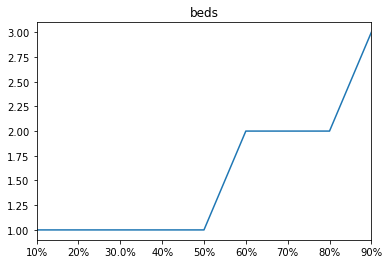

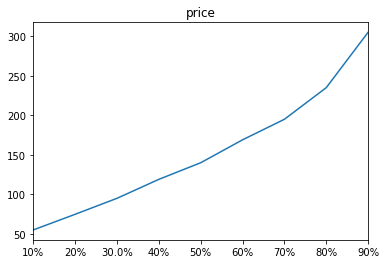

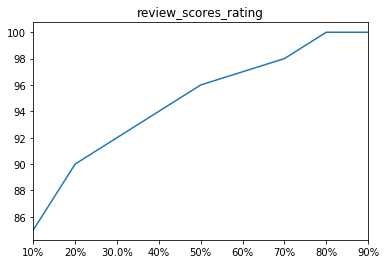

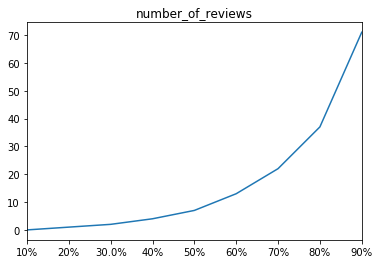

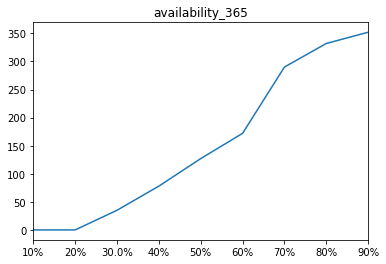

In [8]:
summary_cols = ['beds', 'price', 'review_scores_rating', 'number_of_reviews', 'availability_365']
for col in summary_cols:
    listings[col].describe(percentiles=list(np.arange(0.1,1,0.1)))[4:-1].plot()
    plt.title(col)
    plt.show()

In [26]:
from pandas.stats.api import ols

def chart4(df, x, y):
    temp = pd.DataFrame()
    temp['x'] = df[x]
    temp['y'] = df[y]
    fig = plt.figure(figsize=(6,4))
    res = ols(y=temp['y'], x=temp['x'])
    label = 'R2: ' + str(res.r2)
    temp['yhat'] = temp['x']*res.beta[0] + res.beta[1]
    axis=fig.add_subplot(1,1,1)
    temp.plot(ax=axis,kind='scatter', x='x', y='y', title='{} vs {}'.format(x, y))
    temp.plot(ax=axis, kind='scatter', x='x', y='yhat', color='grey', s=1, label=label)
    axis.set_xlabel(x)
    axis.set_ylabel(y)
    fig.tight_layout()
    return

/home/bdice/anaconda3/envs/glotzer/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html


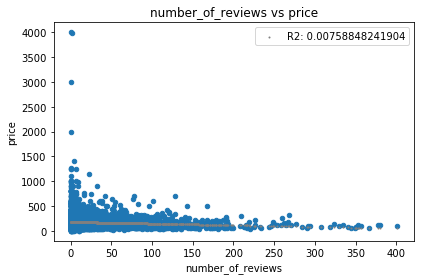

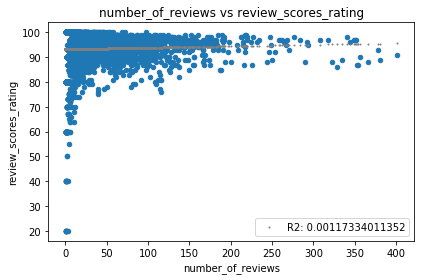

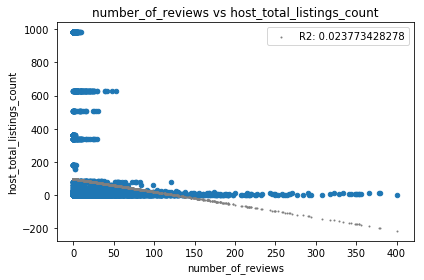

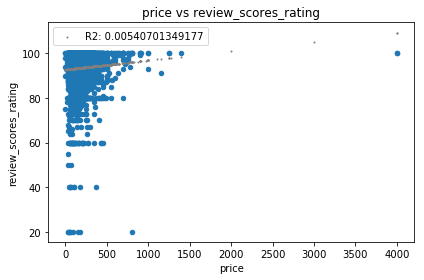

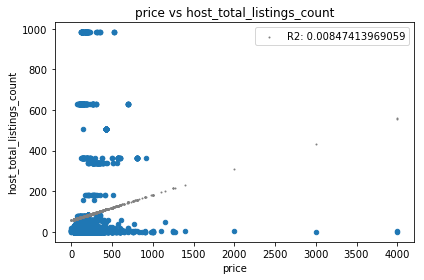

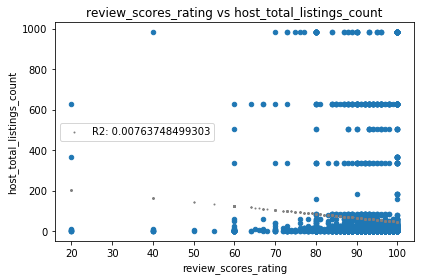

In [27]:
from itertools import combinations
corr_vars = ['number_of_reviews', 'price', 'review_scores_rating', 'host_total_listings_count']
for pair in combinations(corr_vars, 2):
    chart4(listings, pair[0], pair[1])